### **1. Carregamentos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('infringement_dataset.csv')

### **2. Pré-processamento de dados**

In [3]:
df.shape

(307511, 69)

In [4]:
df.head()

,loan_id,infringed,contract_type,gender,has_own_car,has_own_realty,num_children,annual_income,credit_amount,credit_annuity,...,SK_ID_CURR,avg_days_decision,past_avg_amount_annuity,past_avg_amt_application,past_avg_amt_credit,past_loans_approved,past_loans_refused,past_loans_canceled,past_loans_unused,past_loans_total
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,100002.0,606.000000,9251.775,179055.00,179055.00,1.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,100003.0,1305.000000,56553.990,435436.50,484191.00,3.0,0.0,0.0,0.0,3.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,100004.0,815.000000,5357.250,24282.00,20106.00,1.0,0.0,0.0,0.0,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,100006.0,272.444444,23651.175,272203.26,291695.50,5.0,3.0,1.0,0.0,9.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,100007.0,1222.833333,12278.805,150530.25,166638.75,6.0,0.0,0.0,0.0,6.0


In [5]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [6]:
df.select_dtypes(include=['O']).head()

,contract_type,gender,has_own_car,has_own_realty,income_type,education,family_status,housing_type,occupation_type,organization_type,first_name,last_name,address
0,Cash loans,M,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,Robert,Watkins,"PSC 6214, Box 0499\nAPO AE 50653"
1,Cash loans,F,N,N,State servant,Higher education,Married,House / apartment,Core staff,School,Jane,Navarro,"537 Jones Views Suite 234\nWebbton, AR 28006"
2,Revolving loans,M,Y,Y,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,David,Seagraves,"7418 Brown Rapid Apt. 502\nLake Amber, OK 60478"
3,Cash loans,F,N,Y,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,Deborah,Tandy,"812 Macias Roads Suite 039\nHelenland, MA 10754"
4,Cash loans,M,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,David,Walker,"093 Laura Overpass Suite 487\nLake Bryanside, ..."


In [7]:
print(df.gender.unique())
print(df.has_own_car.unique())
print(df.has_own_realty.unique())

['M' 'F' 'XNA']
['N' 'Y']
['Y' 'N']


In [8]:
len(df[df.gender=='XNA'])

4

In [9]:
df = df[df.gender!='XNA']

In [10]:
print(df.gender.unique())
print(df.has_own_car.unique())
print(df.has_own_realty.unique())

['M' 'F']
['N' 'Y']
['Y' 'N']


In [11]:
df['gender'] = df['gender'].replace({'M': 1, 'F': 0})
df['has_own_car'] = df['has_own_car'].replace({'Y': 1, 'N': 0})
df['has_own_realty'] = df['has_own_realty'].replace({'Y': 1, 'N': 0})

In [12]:
df.dtypes.head(10)

loan_id             int64
infringed           int64
contract_type      object
gender              int64
has_own_car         int64
has_own_realty      int64
num_children        int64
annual_income     float64
credit_amount     float64
credit_annuity    float64
dtype: object

In [13]:
df1 = df.select_dtypes(include=['int64', 'float64'])

In [14]:
df1.shape

(307507, 59)

In [15]:
df1.nunique()

loan_id                     307507
infringed                        2
gender                           2
has_own_car                      2
has_own_realty                   2
num_children                    15
annual_income                 2548
credit_amount                 5603
credit_annuity               13672
goods_valuation               1002
age                             50
days_employed                12574
car_age                         62
provided_mobilephone             2
provided_workphone               2
provided_homephone               2
mobilephone_reachable            2
provided_email                   2
num_family_members              17
region_rating                    3
score_ext_1                 114583
score_ext_2                 119830
score_ext_3                    814
appendix_a                       2
appendix_b                       2
appendix_c                       2
appendix_d                       2
appendix_e                       2
appendix_f          

In [16]:
df1.columns

Index(['loan_id', 'infringed', 'gender', 'has_own_car', 'has_own_realty',
       'num_children', 'annual_income', 'credit_amount', 'credit_annuity',
       'goods_valuation', 'age', 'days_employed', 'car_age',
       'provided_mobilephone', 'provided_workphone', 'provided_homephone',
       'mobilephone_reachable', 'provided_email', 'num_family_members',
       'region_rating', 'score_ext_1', 'score_ext_2', 'score_ext_3',
       'appendix_a', 'appendix_b', 'appendix_c', 'appendix_d', 'appendix_e',
       'appendix_f', 'appendix_g', 'appendix_h', 'appendix_i', 'appendix_j',
       'appendix_k', 'appendix_l', 'appendix_m', 'appendix_n', 'appendix_o',
       'appendix_p', 'appendix_q', 'appendix_r', 'appendix_s', 'appendix_t',
       'num_req_bureau_hour', 'num_req_bureau_day', 'num_req_bureau_week',
       'num_req_bureau_month', 'num_req_bureau_qrt', 'num_req_bureau_year',
       'SK_ID_CURR', 'avg_days_decision', 'past_avg_amount_annuity',
       'past_avg_amt_application', 'past_avg_a

In [ ]:
columns_to_remove = ['region_rating', 'score_ext_1', 'score_ext_2', 'score_ext_3', 'appendix_a', 'appendix_b', 'appendix_c',
                     'appendix_d', 'appendix_e', 'appendix_f', 'appendix_g', 'appendix_h', 'appendix_i', 'appendix_j',
                     'appendix_k', 'appendix_l', 'appendix_m', 'appendix_n', 'appendix_o', 'appendix_p', 'appendix_q',
                     'appendix_r', 'appendix_s', 'appendix_t', 'num_req_bureau_hour', 'num_req_bureau_day', 'num_req_bureau_week',
                     'num_req_bureau_month', 'num_req_bureau_qrt', 'num_req_bureau_year', 'SK_ID_CURR', 'avg_days_decision']
df2 = df1.drop(columns_to_remove, axis=1)

In [ ]:
df2.shape

In [ ]:
df2.nunique()

In [ ]:
round(df2.isna().sum()/len(df2),3).sort_values(ascending=False)

#### Decidindo ficar com car_age, mesmo eliminando todos os valores nulos, resta 34% da base original, ou ~100K linhas!

In [ ]:
base_all = df2.dropna()

In [ ]:
base_all.shape

In [24]:
# Base somente Homens --> exclui-se a coluna de gênero
base_m = base_all[base_all.gender==1].drop('gender',axis=1)
print(base_m.shape)
# Base somente Mulheres --> exclui-se a coluna de gênero
base_f = base_all[base_all.gender==0].drop('gender',axis=1)
print(base_f.shape)

(55693, 26)
(42643, 26)


#### A distribuição entre homens (56,5%) e mulheres (43,5%) é relativamente balanceada, o que permite fazer comparações entre esses grupos sem muito viés.

### **3. Análise Base Geral**

### 3.1. Primeiras infos PCA

In [25]:
from sklearn.decomposition import PCA

In [26]:
# Inicialize o modelo PCA com o número de componentes desejado (por exemplo, 2 componentes)
pca = PCA(n_components=len(base_all.columns))
pca.fit_transform(base_all)

# Obtenha as proporções de variância explicada
explained_variance = pca.explained_variance_ratio_

# Obtenha os autovalores
eigenvalues = pca.explained_variance_

print("Variância explicada")
print(explained_variance)

print("\nAutovalores")
print(eigenvalues)

Variância explicada
[7.57730677e-01 1.47509383e-01 3.69270378e-02 2.63985498e-02
 2.45006765e-02 4.90849891e-03 1.69144457e-03 2.28502160e-04
 1.05229124e-04 3.28575048e-10 1.91164199e-10 4.80113165e-11
 6.61385521e-12 4.20072526e-12 3.05306525e-12 5.63392868e-13
 4.77322229e-13 3.87845709e-13 3.40230371e-13 1.55684302e-13
 1.44264393e-13 1.31730191e-13 1.78367370e-15 2.73765800e-16
 3.14030186e-33 3.14030186e-33 3.14030186e-33]

Autovalores
[3.27864310e+11 6.38261899e+10 1.59780488e+10 1.14224520e+10
 1.06012567e+10 2.12387020e+09 7.31875221e+08 9.88711493e+07
 4.55318430e+07 1.42171928e+02 8.27152973e+01 2.07741320e+01
 2.86176492e+00 1.81762192e+00 1.32103815e+00 2.43775816e-01
 2.06533704e-01 1.67817893e-01 1.47215098e-01 6.73634152e-02
 6.24221074e-02 5.69986534e-02 7.71782064e-04 1.18456383e-04
 1.35878477e-21 1.35878477e-21 1.35878477e-21]


### 4.2. Scree plot

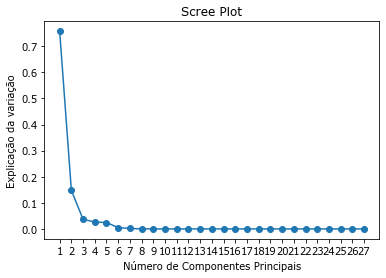

In [27]:
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Explicação da variação')
plt.title('Scree Plot')

plt.show()

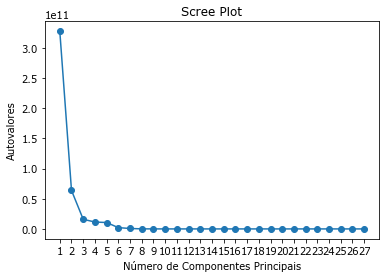

In [28]:
plt.plot(range(1, len(explained_variance) + 1), eigenvalues, marker='o', linestyle='-')
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Autovalores')
plt.title('Scree Plot')

plt.show()

#### Este segundo é o scree plot em si, pois no eixo Y são representados os autovalores.

#### Portanto, **2 componentes** são suficientes para a explicação de base_all.

### 3.3. Loadings (Variáveis que mais contribuem para os 2 componentes)

In [29]:
# Obtenha os autovetores (vetores próprios)
eigenvectors = pca.components_

# Crie um DataFrame para visualizar os autovetores com os nomes das variáveis originais
eigenvectors_df = pd.DataFrame(eigenvectors, columns=base_all.columns)

# Agora, para cada componente principal, você pode ver como as variáveis originais contribuem para ele.
# Por exemplo, para o primeiro componente principal:
component_1 = eigenvectors_df.iloc[0]
component_2 = eigenvectors_df.iloc[1]

In [30]:
print("Contribuição das variáveis para o primeiro componente principal:")
print(component_1.sort_values(ascending=False))

Contribuição das variáveis para o primeiro componente principal:
credit_amount               7.294786e-01
goods_valuation             6.709601e-01
past_avg_amt_credit         8.016326e-02
past_avg_amt_application    7.665259e-02
annual_income               7.040818e-02
credit_annuity              1.972543e-02
past_avg_amount_annuity     4.853605e-03
loan_id                     2.019672e-04
age                         2.643586e-06
past_loans_approved         8.103236e-08
num_family_members          3.835930e-08
provided_email              6.313329e-09
provided_workphone          2.484061e-09
mobilephone_reachable       3.924153e-10
has_own_car                 2.775558e-17
provided_mobilephone        0.000000e+00
provided_homephone         -1.642941e-09
past_loans_unused          -1.711787e-08
infringed                  -1.717442e-08
has_own_realty             -2.149329e-08
num_children               -3.076089e-08
gender                     -3.505541e-08
past_loans_refused         -3.730

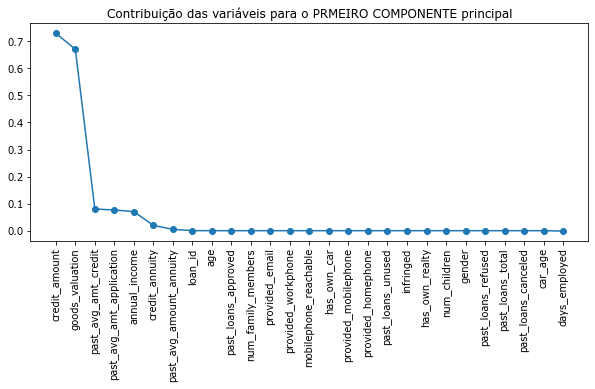

In [31]:
plt.figure(figsize=(10,4))
plt.title('Contribuição das variáveis para o PRMEIRO COMPONENTE principal')
plt.plot(component_1.sort_values(ascending=False), marker='o', linestyle='-')
plt.xticks(rotation=90)

plt.show()

In [32]:
print("Contribuição das variáveis para a segunda componente principal:")
print(component_2.sort_values(ascending=False))

Contribuição das variáveis para a segunda componente principal:
past_avg_amt_credit         7.218727e-01
past_avg_amt_application    6.735538e-01
annual_income               1.007836e-01
past_avg_amount_annuity     3.272610e-02
days_employed               1.007849e-02
loan_id                     1.423358e-03
credit_annuity              6.164039e-04
age                         5.291787e-06
past_loans_total            2.703760e-06
past_loans_canceled         1.529965e-06
past_loans_approved         7.653003e-07
past_loans_refused          4.935194e-07
provided_email              7.211409e-08
has_own_realty              4.175403e-08
infringed                   4.904165e-10
has_own_car                 2.220446e-16
provided_mobilephone       -0.000000e+00
mobilephone_reachable      -1.051757e-09
provided_workphone         -2.842310e-08
provided_homephone         -2.851388e-08
gender                     -5.844894e-08
past_loans_unused          -8.502441e-08
num_family_members         -1.1475

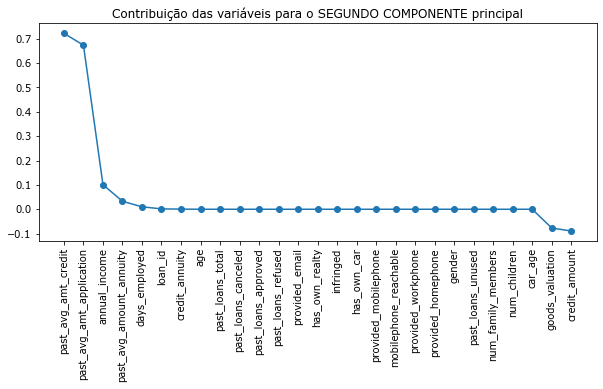

In [33]:
plt.figure(figsize=(10,4))
plt.title('Contribuição das variáveis para o SEGUNDO COMPONENTE principal')
plt.plot(component_2.sort_values(ascending=False), marker='o', linestyle='-')
plt.xticks(rotation=90)

plt.show()

#### Coincidentemente, as duas variáveis que mais explicam o PRIMEIRO COMPONENTE (goods_valuation e credit_amount) são os que menos explicam o SEGUNDO COMPONENTE...

### Resumo dos Loadings

In [34]:
# Trabalhando com apenas 2 componentes
pca = PCA(n_components=2)
pca.fit(base_all)
base_all_pca = pca.transform(base_all)

In [35]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2'], index=base_all.columns)
round(loadings,3)

,PC1,PC2
loan_id,0.000,0.001
infringed,-0.000,0.000
gender,-0.000,-0.000
has_own_car,-0.000,-0.000
has_own_realty,-0.000,0.000
num_children,-0.000,-0.000
annual_income,0.070,0.101
credit_amount,0.729,-0.089
credit_annuity,0.020,0.001
goods_valuation,0.671,-0.077


#### Abaixo, a participação de uma variável em relação às duas! Aqui não é o tamanho do impacto, mas como cada uma delas impacta nas componentes. Por exemplo, loan_id impacta muito mais em PC2 apesar do abosluto dessa var ser quase zero (tabela acima).

In [36]:
norm_loadings = loadings.div(loadings.sum(axis=1), axis=0)
round(norm_loadings,3)

,PC1,PC2
loan_id,0.124,0.876
infringed,1.029,-0.029
gender,0.375,0.625
has_own_car,1.000,0.000
has_own_realty,-1.061,2.061
num_children,0.161,0.839
annual_income,0.411,0.589
credit_amount,1.140,-0.140
credit_annuity,0.970,0.030
goods_valuation,1.129,-0.129


### 3.4. Loading plot

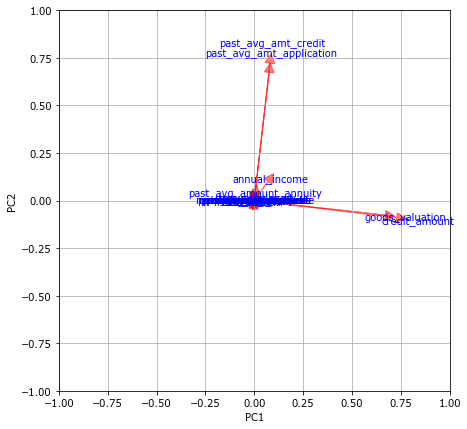

In [37]:
def loading_plot(coeff, labels):
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], head_width = 0.05, head_length = 0.05, color = 'red',alpha = 0.5)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'blue', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()

fig, ax = plt.subplots(figsize = (7,7))
loading_plot(pca.components_.T, base_all.columns)

#### Percebe-se que as duas variáveis principais que melhor explicam cada componente estão altamente correlacionadas. De um lado, "goods_valuation" com "credit_amount" e, de outro, "past_avg_amt_credit" com "past_avg_amt_application".

#### Além disso, cada um desses pares não se relacionam entre si (cos~0º)...

#### Annual income tem força menor, mas é a 5ªa variável, pois é a 5ª a explicar PC1 e 3ª de PCA. Possui correlação positiva média com as quatro variáveis principais.

## Tentei acima criar uma maneira de selecionar os vetores mais compridos apenas, por ex N=2 N=4... mas como comecei a levar muito tempo, deixei de lado e segui pra entregar, acho que pode-se tentar apenas se houver tempo hábil =)

### 3.5. Score plot

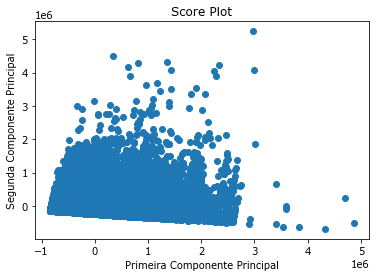

In [38]:
plt.scatter(base_all_pca[:, 0], base_all_pca[:, 1])
plt.xlabel('Primeira Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Score Plot')

plt.show()

#### O score plot mostra que não existe nenhuma relação óbvia entre as duas componentes senão uma relação de perpendicularidade entre ambas.
#### Não existe grandes clusteres bem separados também.
#### Poucos são os pontos de outlier, sendo os principais aqueles que se encontram em X>3 e Y<1 (menos de 1 dúzia de ponto).

### 3.6. Análise de resíduos

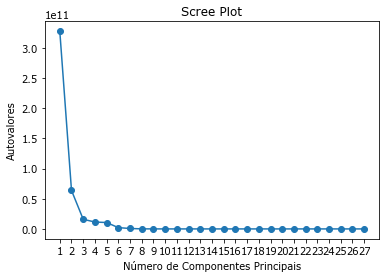

In [39]:
### Retoando o Scree Plot
plt.plot(range(1, len(explained_variance) + 1), eigenvalues, marker='o', linestyle='-')
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Autovalores')
plt.title('Scree Plot')

plt.show()

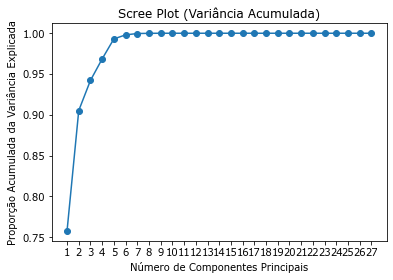

In [40]:
# Calcule os autovalores acumulados
cumulative_eigenvalues = np.cumsum(eigenvalues)

# Calcule a proporção acumulada da variância explicada
explained_variance_ratio = cumulative_eigenvalues / np.sum(eigenvalues)

# Crie o gráfico de Scree Plot com autovalores acumulados
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1, step=1))
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Proporção Acumulada da Variância Explicada')
plt.title('Scree Plot (Variância Acumulada)')

plt.show()

#### Reforça-se que com 1 componente se explica 75% da variação total de X e que, com 2 componentes, 90%.

In [41]:
scores = np.array([base_all_pca[:, 0], base_all_pca[:, 1]])

In [42]:
# Obtenha o número total de pontos
total_points = scores.shape[1]

# Trabalhando com apenas 1% dos dados, porque são muitos
num_points_to_select = total_points // 100

# Gere índices aleatórios para selecionar os pontos
random_indices = np.random.choice(total_points, size=num_points_to_select, replace=False)

# Selecione os pontos correspondentes aos índices gerados aleatoriamente
selected_scores = scores[:, random_indices]

In [ ]:
from scipy.spatial.distance import cdist

centroid = np.mean(selected_scores, axis=0)
distancias_mahalanobis = cdist(selected_scores, centroid.reshape(1, -1), 'mahalanobis', VI=np.linalg.inv(np.cov(selected_scores)))

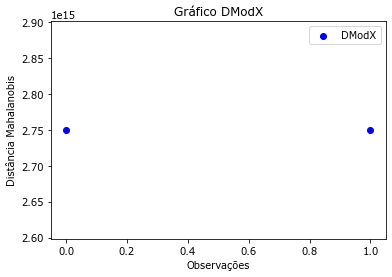

In [53]:
from scipy.spatial import distance

# Calcule as distâncias Mahalanobis dos pontos de dados aos centroides
centroid = np.mean(selected_scores, axis=0)
DModX = [distance.mahalanobis(point, centroid, np.cov(selected_scores.T)) for point in selected_scores]

# Plote o gráfico DModX
plt.scatter(range(len(DModX)), DModX, c='b', label='DModX', marker='o')
plt.xlabel('Observações')
plt.ylabel('Distância Mahalanobis')
plt.legend()
plt.title('Gráfico DModX')
plt.show()

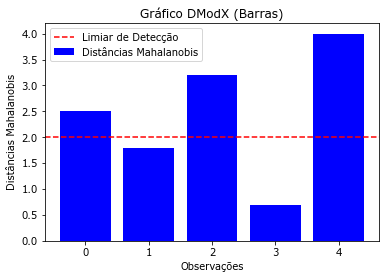

In [54]:
distancias_mahalanobis = [2.5, 1.8, 3.2, 0.7, 4.0]  # Substitua pelos seus próprios valores

# Defina um limiar de detecção (opcional)
limiar = 2.0

# Crie um gráfico de barras das distâncias Mahalanobis
plt.bar(range(len(distancias_mahalanobis)), distancias_mahalanobis, color='b', label='Distâncias Mahalanobis')
plt.axhline(y=limiar, color='r', linestyle='--', label='Limiar de Detecção')
plt.xlabel('Observações')
plt.ylabel('Distâncias Mahalanobis')
plt.legend()
plt.title('Gráfico DModX (Barras)')
plt.show()

### **4. Análise Base Homens - Base Mulheres**

### 4.1. Primeiras infos PCA

### 4.2. Scree plot

### 4.1. Loadings

### Resumo dos Loadings

### 4.4. Loading plot

### 4.5. Score plot

### 4.6. Análise de resíduos

## ver se vale assim separado ou tudo junto com cada gráfico sendo um subplot (o que for tranquilo de fazer)